# Facebook Prophet
FbProphet is a robust library for time series data analysis and forecast, developed by facebook's core data science team. It is based on Generalized Additive Model(GAM).There are 3 major component of it:
- Trend Component {<b>g(t)</b>}
- Seasonal Component {<b>s(t)</b>}
- holiday component {<b>h(t)</b>}
            
<b>y(t)=g(t)+s(t)+h(t)+E</b>, E=error caused by unsual changes not accomodated by model

In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
data=pd.read_csv("data.csv")
data.head()

,Unnamed: 0,Date,open,high,low,close,vol,RSI,MACD,CCI,ADX
0,0,2012-01-01,873.0,879.0,851.0,879.0,799,NaN,0.000000,NaN,NaN
1,1,2012-01-02,879.0,913.0,882.0,900.0,1002,100.000000,0.471154,66.666667,100.000000
2,2,2012-01-03,900.0,916.0,892.0,892.0,2653,70.909091,0.352264,54.237288,100.000000
3,3,2012-01-04,892.0,875.0,842.0,865.0,490,34.466349,-0.685267,-84.313725,67.623618
4,4,2012-01-05,865.0,875.0,858.0,858.0,121,30.141309,-1.513166,-59.581320,52.310464


In [4]:
data=data[['Date','close']]
data.columns=['ds','y']
data.ds=pd.to_datetime(data.ds)
data.head()

,ds,y
0,2012-01-01,879.0
1,2012-01-02,900.0
2,2012-01-03,892.0
3,2012-01-04,865.0
4,2012-01-05,858.0


In [5]:
data.shape

(1910, 2)

In [6]:
data.isna().sum()

ds    0
y     0
dtype: int64

In [7]:
import matplotlib.pyplot as plt

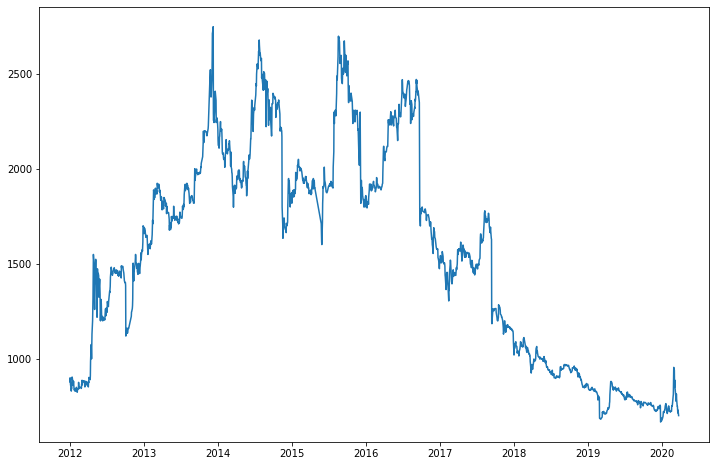

In [8]:
plt.figure(figsize=(12,8))
plt.plot(data.set_index(['ds']))

## Smoothing the curve by resampling it in week frequency.

In [9]:
data.set_index(['ds'],inplace=True)
data.y=data.y.resample("W").mean()
data.dropna(inplace=True)
data.head(10)

,y
ds,
2012-01-01,879.000000
2012-01-08,869.000000
2012-01-22,864.500000
2012-01-29,833.750000
2012-02-05,838.250000
2012-02-12,835.600000
2012-02-26,848.000000
2012-03-04,867.200000
2012-03-11,883.333333


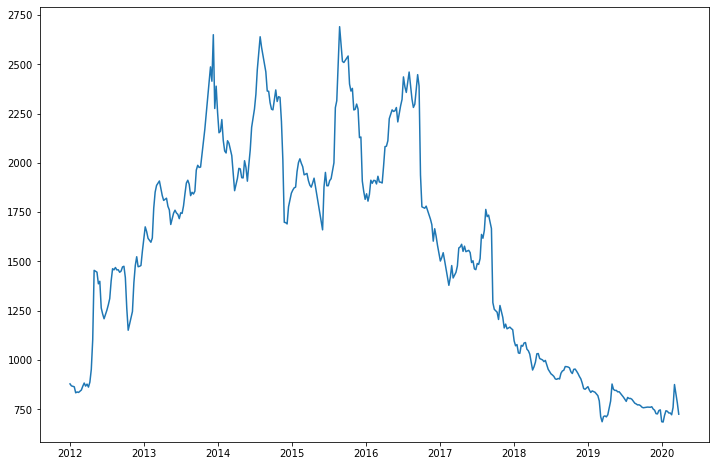

In [10]:
plt.figure(figsize=(12,8))
plt.plot(data)

### Columns names should be 'ds' and 'y' to be prophet training compatible. Here, ds represent datestamp and y represents training value

In [13]:
data['ds']=data.index
data.head()

,y,ds
ds,,
2012-01-01,879.00,2012-01-01
2012-01-08,869.00,2012-01-08
2012-01-22,864.50,2012-01-22
2012-01-29,833.75,2012-01-29
2012-02-05,838.25,2012-02-05


In [14]:
#Prophet model
model=Prophet(n_changepoints=35,
              yearly_seasonality=False,
              weekly_seasonality=False,
              daily_seasonality=False,
              changepoint_prior_scale=0.4).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=10)

In [15]:
model.fit(data)

## Inference

In [18]:
future=model.make_future_dataframe(periods=52,freq="W")
forecast=model.predict(future)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


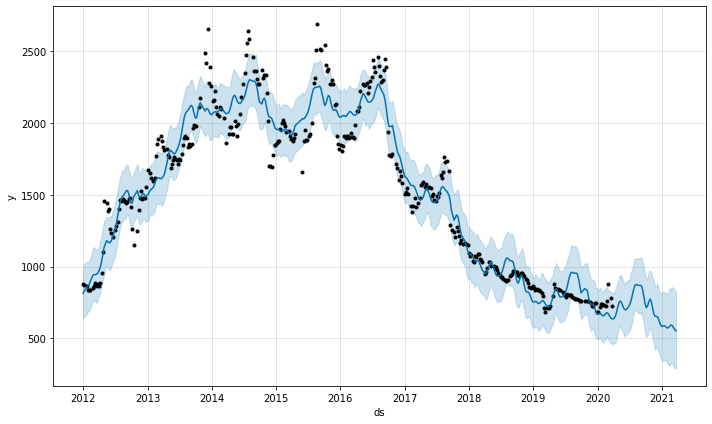

In [19]:
fig=model.plot(forecast) #The model seems to fit well with our data

#### Graphs below give good insights of our data.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


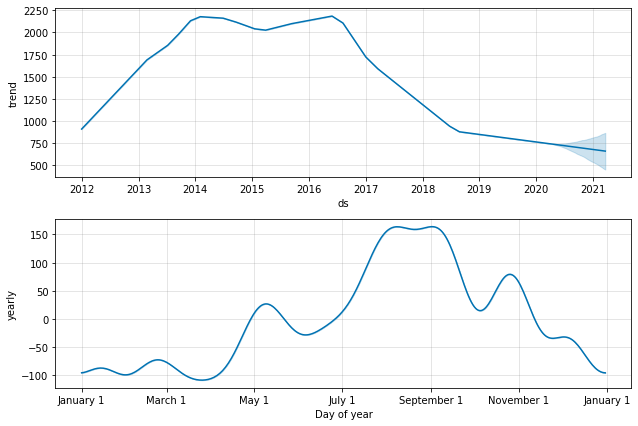

In [20]:
fig2=model.plot_components(forecast)

## In cells below, lets divide our data into training and test set, and see how our model performs on test data.

In [21]:
data.shape

(379, 2)

In [27]:
data_train=data.iloc[:300].copy()
data_test=data.iloc[300:].copy()
data_train.tail()

,y,ds
ds,,
2018-07-08,924.2,2018-07-08
2018-07-15,917.0,2018-07-15
2018-07-22,904.2,2018-07-22
2018-07-29,902.2,2018-07-29
2018-08-05,906.6,2018-08-05


In [38]:
model2=Prophet(n_changepoints=50,
              yearly_seasonality=False,
              weekly_seasonality=False,
              daily_seasonality=False,
              changepoint_prior_scale=0.4).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=5)

In [39]:
model2.fit(data_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future=model2.make_future_dataframe(periods=60,freq="W") #test count=79
forecast=model.predict(future)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


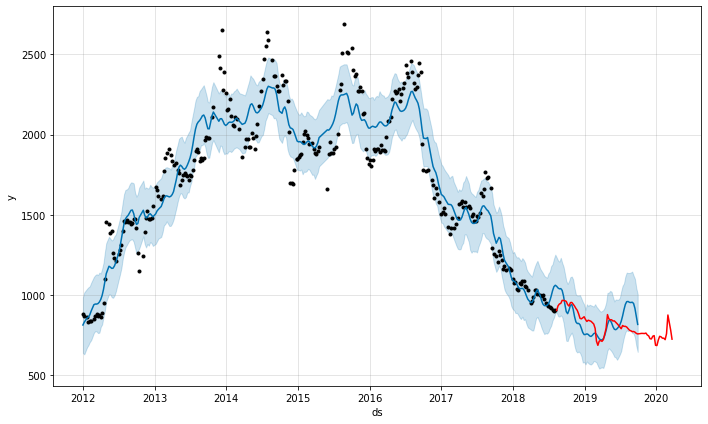

In [47]:
fig3=model2.plot(forecast) ##The model worked well for test data, graphs look similar to the original one. 
plt.plot(data_test.set_index('ds'), 'r')